Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\jaelh\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 167, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 196, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7081, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\\_libs\\hashtable_class_helper.pxi", line 7089, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Word Count'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "c:\Users\jaelh\AppData\Local\Programs\Python\Python39\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\jaelh\AppData\Local\Temp\ipykernel_8868\1765916977.py", line 79, in show_chart
    self.plot_word_

<Figure size 1000x600 with 0 Axes>

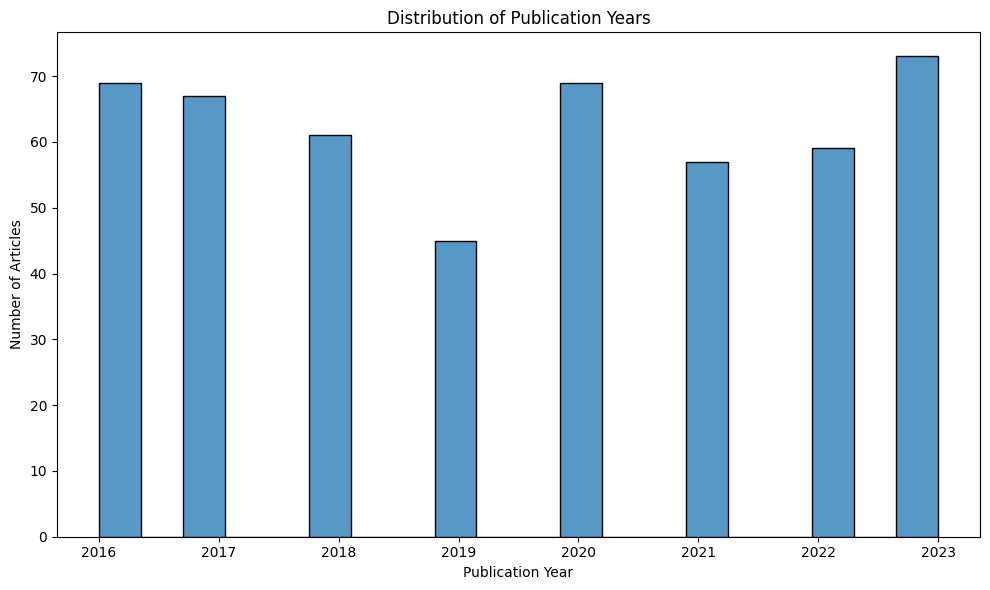

<Figure size 1000x600 with 0 Axes>

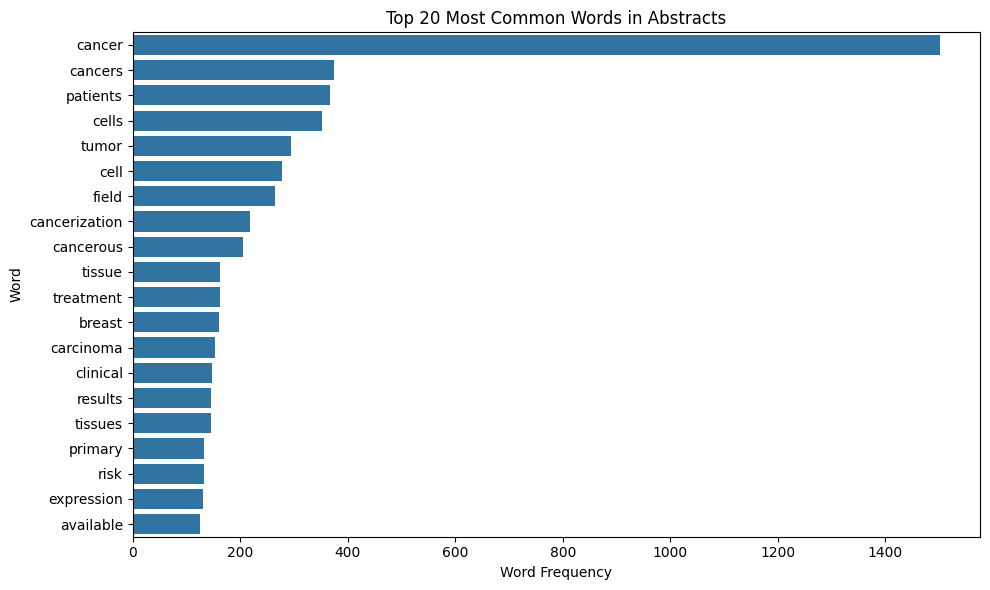

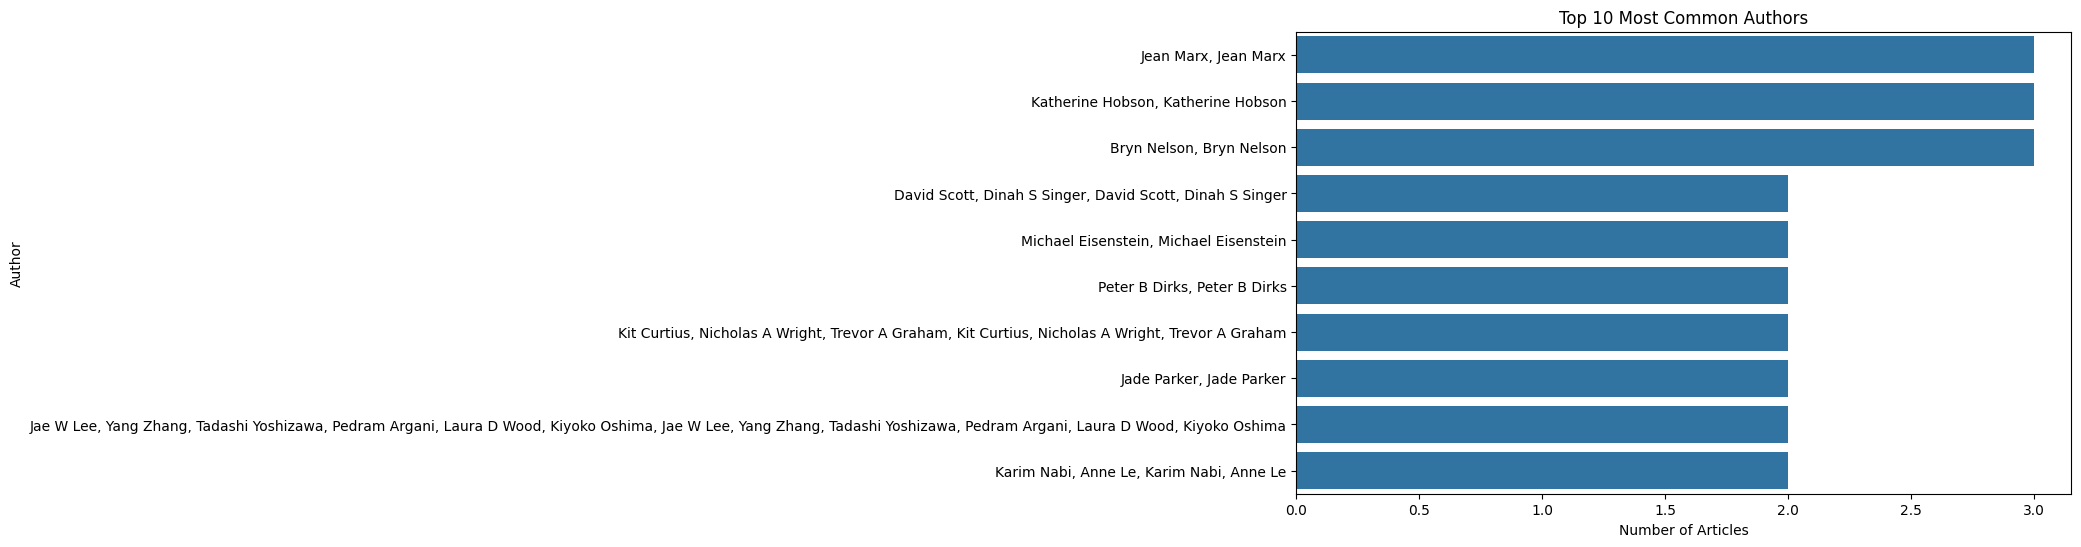

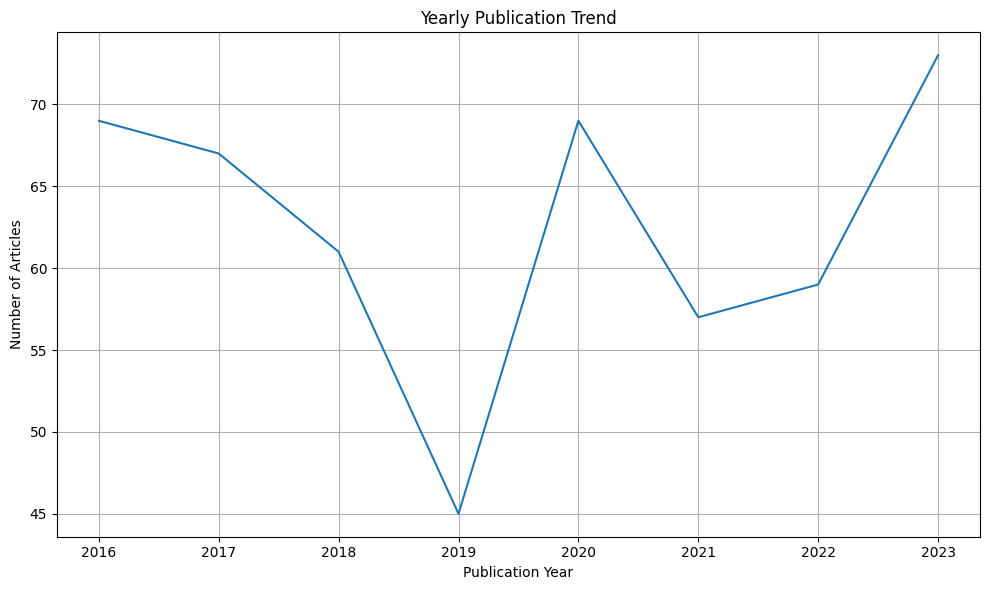

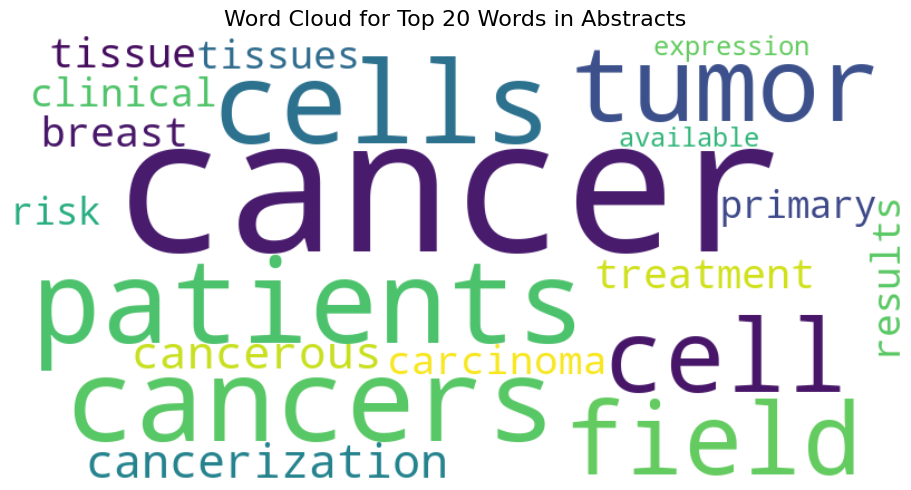

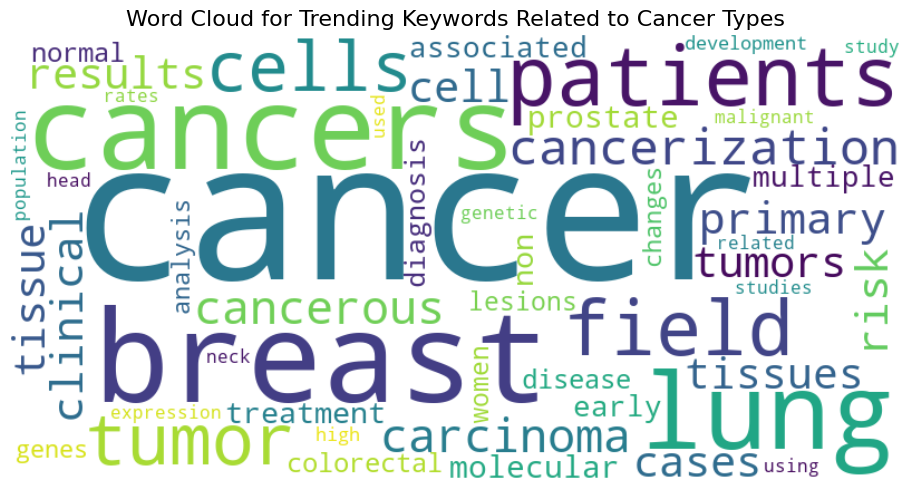

<Figure size 1200x800 with 0 Axes>

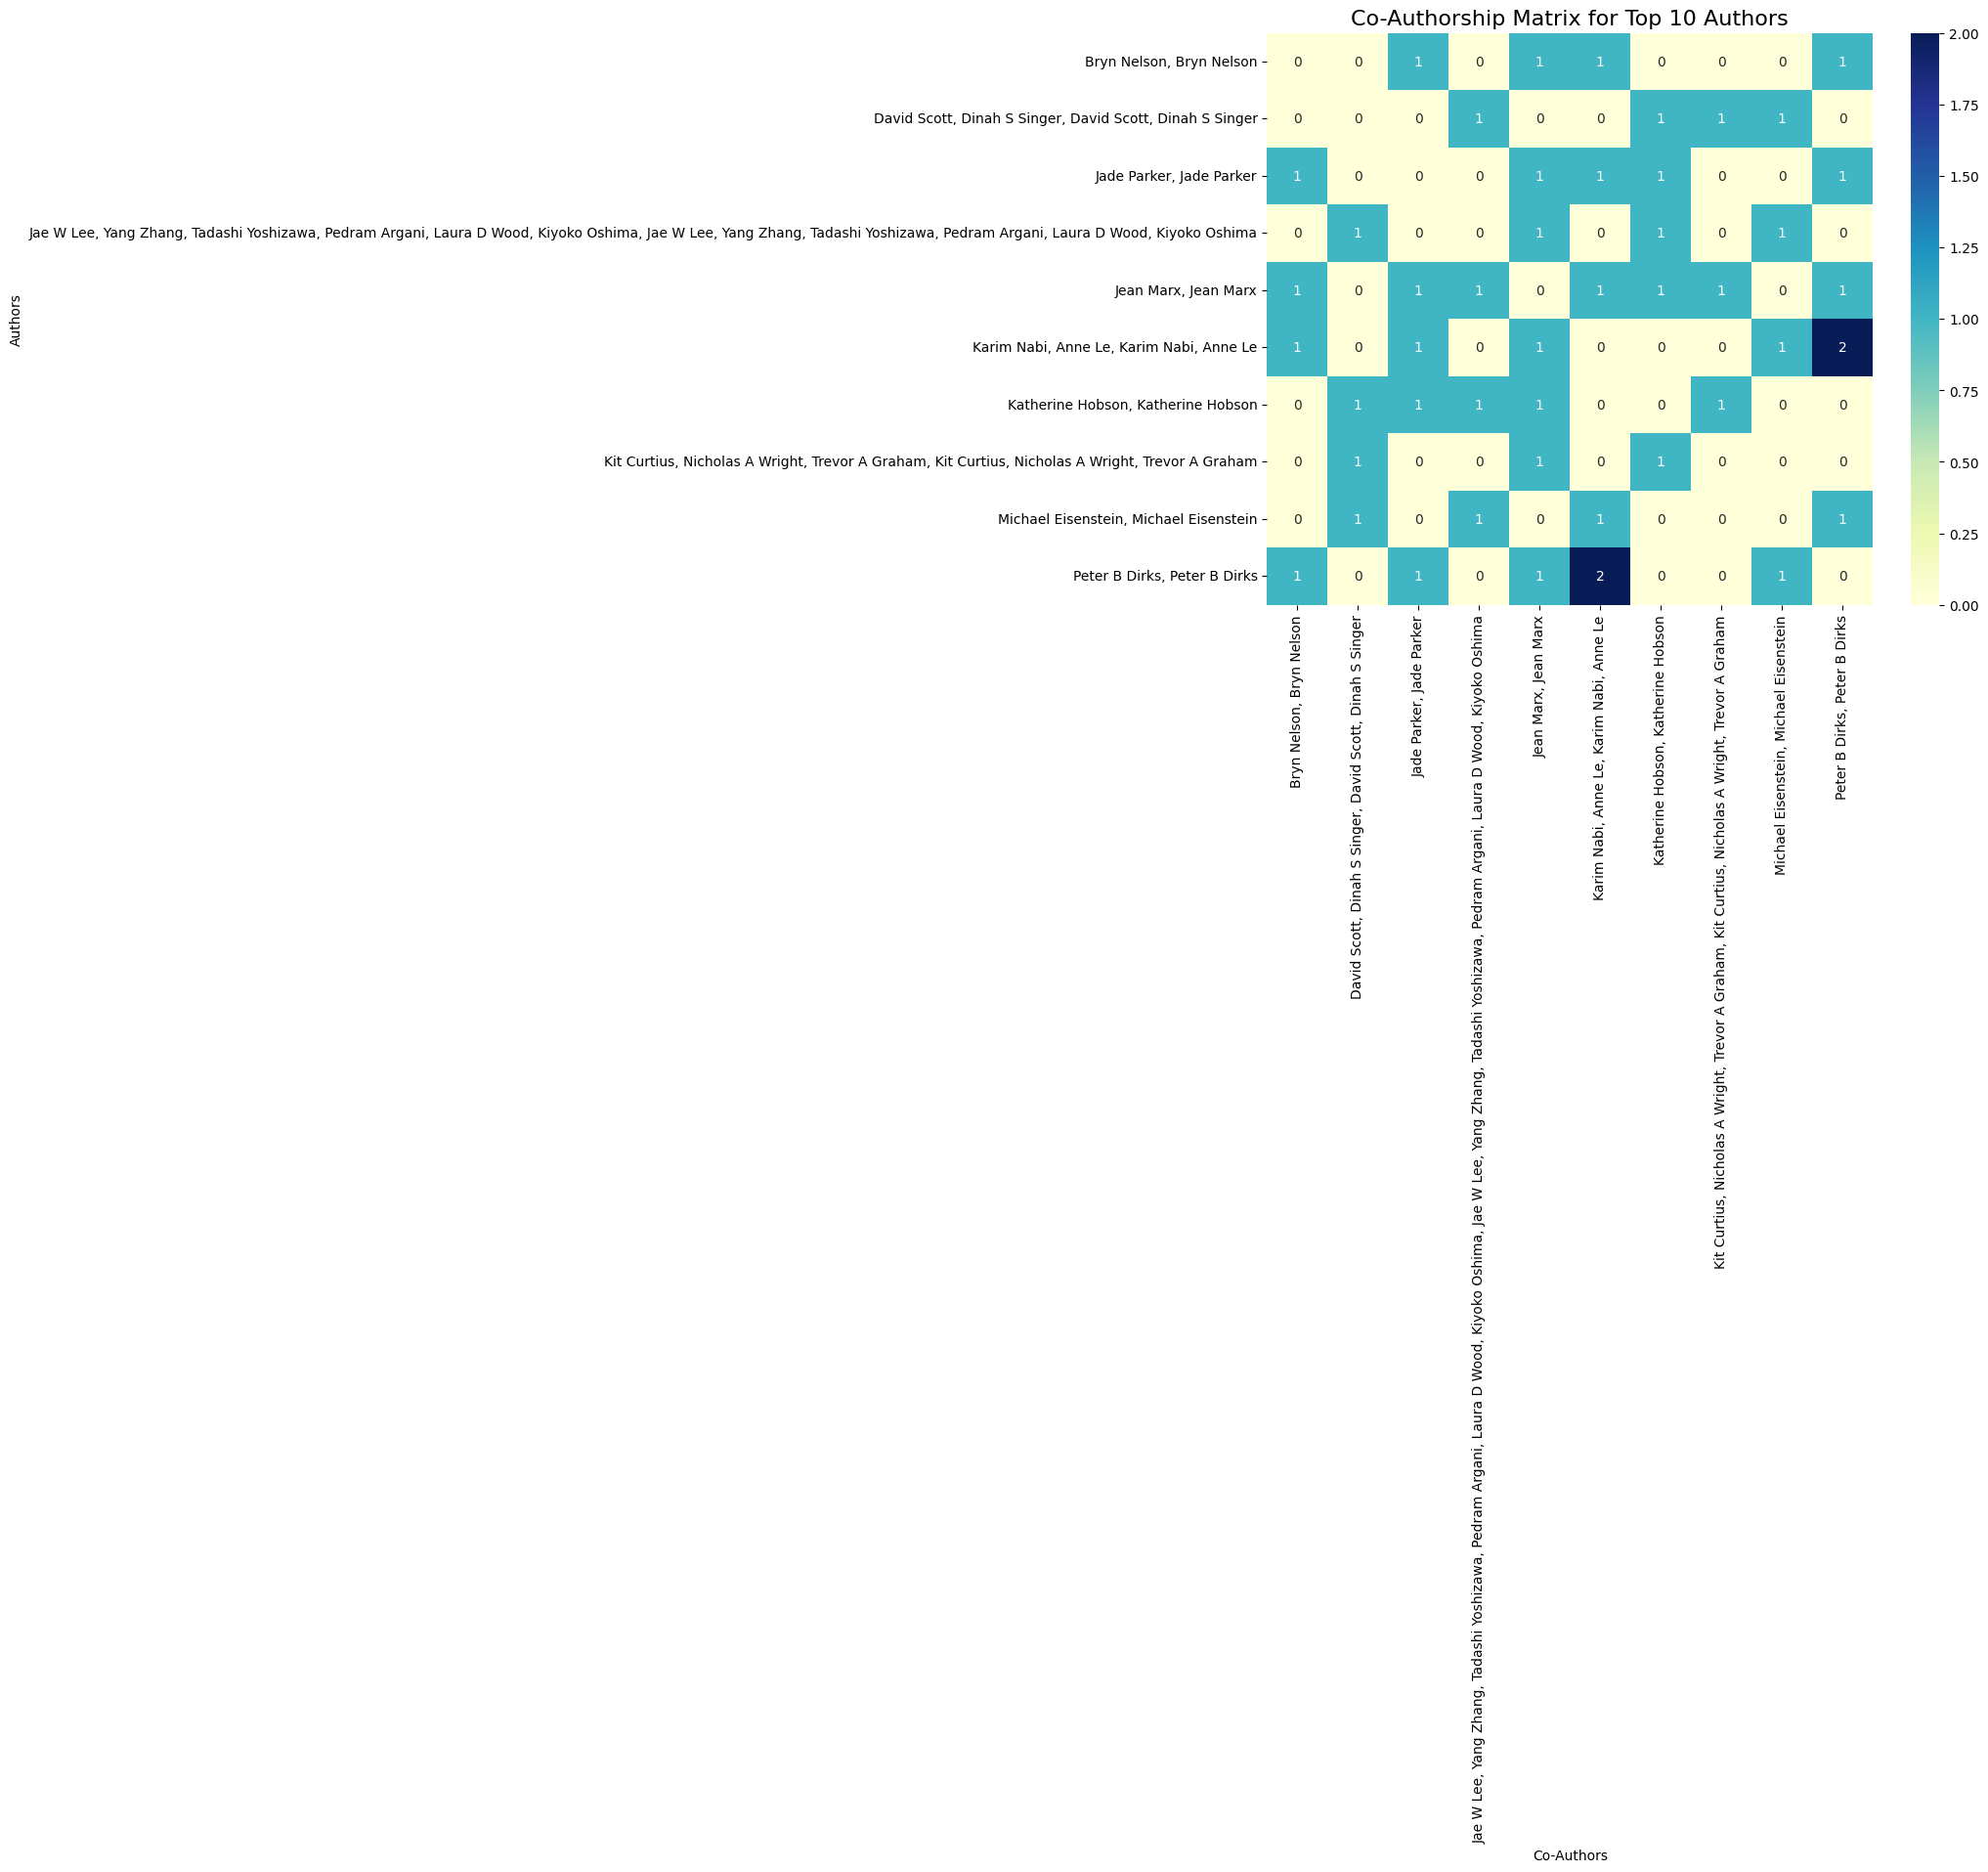

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from tkinter import ttk
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Load your dataset
data = pd.read_csv('cancer_research_pubmed.csv')  # Ensure your CSV file is loaded

# Function to determine sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to abstracts
data['Sentiment'] = data['Abstract'].apply(get_sentiment)

# Prepare word frequency data
data['Abstract'] = data['Abstract'].str.lower()
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(data['Abstract'])
words = vectorizer.get_feature_names_out()
word_counts = X.toarray().sum(axis=0)
word_freq_df = pd.DataFrame({'Word': words, 'Count': word_counts}).sort_values(by='Count', ascending=False)

# Main GUI class
class DataVisualizationApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Cancer Research Visualization")
        self.root.geometry("1000x800")  # Increased size

        # Frame for the chart
        self.frame = ttk.Frame(root)
        self.frame.pack(pady=20)

        # Dropdown for chart selection
        self.chart_type_var = tk.StringVar(value="Distribution of Publication Years")  # Default selection
        self.chart_dropdown = ttk.Combobox(root, textvariable=self.chart_type_var, values=[
            "Distribution of Publication Years",
            "Distribution of Word Counts in Abstracts",
            "Top 20 Most Common Words in Abstracts",
            "Top 10 Most Common Authors",
            "Yearly Publication Trend",
            "Word Cloud for Top 20 Words in Abstracts",
            "Word Cloud for Trending Keywords Related to Cancer Types",
            "Trending Cancer Types from Titles and Abstracts",
            "Co-Authorship Matrix for Top 10 Authors",
            "Heatmap of Cancer Topics Over Time",
            "Sentiment Analysis of Abstracts"
        ])
        self.chart_dropdown.pack(pady=10)

        # Button to display the selected chart
        self.button = ttk.Button(root, text="Show Chart", command=self.show_chart)
        self.button.pack()

    def show_chart(self):
        # Clear existing plots
        for widget in self.frame.winfo_children():
            widget.destroy()

        # Get selected chart type
        chart_type = self.chart_type_var.get()

        if chart_type == "Distribution of Publication Years":
            self.plot_year_distribution()

        elif chart_type == "Distribution of Word Counts in Abstracts":
            self.plot_word_count_distribution()

        elif chart_type == "Top 20 Most Common Words in Abstracts":
            self.plot_common_words()

        elif chart_type == "Top 10 Most Common Authors":
            self.plot_top_authors()

        elif chart_type == "Yearly Publication Trend":
            self.plot_yearly_trend()

        elif chart_type == "Word Cloud for Top 20 Words in Abstracts":
            self.plot_word_cloud_top_words()

        elif chart_type == "Word Cloud for Trending Keywords Related to Cancer Types":
            self.plot_word_cloud_trending_keywords()

        elif chart_type == "Trending Cancer Types from Titles and Abstracts":
            self.plot_cancer_type_trends()

        elif chart_type == "Co-Authorship Matrix for Top 10 Authors":
            self.plot_co_authorship_matrix()

        elif chart_type == "Heatmap of Cancer Topics Over Time":
            self.plot_topic_trends_heatmap()

        elif chart_type == "Sentiment Analysis of Abstracts":
            self.plot_sentiment_analysis()

    def plot_year_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(data['publication'], bins=20, kde=False)
        plt.title('Distribution of Publication Years')
        plt.xlabel('Publication Year')
        plt.ylabel('Number of Articles')
        self._draw_plot()

    def plot_word_count_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(data['Word Count'], bins=30, kde=False)
        plt.title('Distribution of Word Counts in Abstracts')
        plt.xlabel('Word Count')
        plt.ylabel('Number of Articles')
        self._draw_plot()

    def plot_common_words(self):
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Count', y='Word', data=word_freq_df.head(20))
        plt.title('Top 20 Most Common Words in Abstracts')
        plt.xlabel('Word Frequency')
        plt.ylabel('Word')
        self._draw_plot()

    def plot_top_authors(self):
        data_exploded = data.explode('Authors')
        top_authors = data_exploded['Authors'].value_counts().nlargest(10)
        plt.figure(figsize=(10, 6))
        sns.barplot(x=top_authors.values, y=top_authors.index)
        plt.title('Top 10 Most Common Authors')
        plt.xlabel('Number of Articles')
        plt.ylabel('Author')
        self._draw_plot()

    def plot_yearly_trend(self):
        yearly_trend = data.groupby('publication').size()
        plt.figure(figsize=(10, 6))
        yearly_trend.plot(kind='line')
        plt.title('Yearly Publication Trend')
        plt.xlabel('Publication Year')
        plt.ylabel('Number of Articles')
        plt.grid(True)
        self._draw_plot()

    def plot_word_cloud_top_words(self):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(words, word_counts)))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud for Top 20 Words in Abstracts', fontsize=16)
        self._draw_plot()

    def plot_word_cloud_trending_keywords(self):
        # Assuming 'filtered_data' is defined
        filtered_data = data[data['Abstract'].str.contains('|'.join(['breast', 'lung', 'colon', 'prostate', 'leukemia']), case=False, na=False)]
        vectorizer = CountVectorizer(stop_words='english', max_features=50)
        tfidf_matrix = vectorizer.fit_transform(filtered_data['Abstract'])
        keyword_scores = tfidf_matrix.sum(axis=0).A1
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(vectorizer.get_feature_names_out(), keyword_scores)))
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud for Trending Keywords Related to Cancer Types', fontsize=16)
        self._draw_plot()

    def plot_cancer_type_trends(self):
        cancer_types = ['breast', 'lung', 'colon', 'prostate', 'leukemia', 'melanoma']
        cancer_type_counts = {cancer: data['combined'].str.contains(cancer, case=False, na=False).sum() for cancer in cancer_types}
        cancer_trend_df = pd.DataFrame(cancer_type_counts.items(), columns=['Cancer Type', 'Count']).sort_values(by='Count', ascending=False)
        plt.figure(figsize=(10, 5))
        plt.bar(cancer_trend_df['Cancer Type'], cancer_trend_df['Count'], color='skyblue')
        plt.xlabel('Cancer Type')
        plt.ylabel('Count')
        plt.title('Trending Cancer Types from Titles and Abstracts', fontsize=16)
        plt.xticks(rotation=45)
        self._draw_plot()

    def plot_co_authorship_matrix(self):
        data_exploded = data.explode('Authors')
        top_authors = data_exploded['Authors'].value_counts().nlargest(10).index.tolist()
        top_authors_data = data_exploded[data_exploded['Authors'].isin(top_authors)]
        co_author_pairs = []
        for idx, row in top_authors_data.iterrows():
            authors = row['Authors']
            co_authors = top_authors_data[top_authors_data['publication'] == row['publication']]['Authors'].unique()
            for co_author in co_authors:
                if co_author != authors:
                    co_author_pairs.append((authors, co_author))
        co_author_df = pd.DataFrame(co_author_pairs, columns=['Author1', 'Author2'])
        co_auth_matrix = pd.crosstab(co_author_df['Author1'], co_author_df['Author2'])
        plt.figure(figsize=(12, 10))
        sns.heatmap(co_auth_matrix, cmap='YlGnBu', annot=True, fmt='d')
        plt.title('Co-Authorship Matrix for Top 10 Authors', fontsize=16)
        plt.xlabel('Co-Authors')
        plt.ylabel('Authors')
        self._draw_plot()

    def plot_topic_trends_heatmap(self):
        # Placeholder for actual topic trends data
        # Replace with your actual data
        topic_trends = pd.DataFrame()  # Load or calculate your topic trends here
        plt.figure(figsize=(12, 8))
        sns.heatmap(topic_trends, cmap='coolwarm', annot=True, fmt='d')
        plt.title('Heatmap of Cancer Topics Over Time', fontsize=16)
        self._draw_plot()

    def plot_sentiment_analysis(self):
        sentiment_counts = data['Sentiment'].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
        plt.title('Sentiment Analysis of Abstracts')
        plt.xlabel('Sentiment')
        plt.ylabel('Number of Articles')
        self._draw_plot()

    def _draw_plot(self):
        """Helper function to draw the plot in the Tkinter frame."""
        plt.tight_layout()
        canvas = FigureCanvasTkAgg(plt.gcf(), master=self.frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

if __name__ == "__main__":
    root = tk.Tk()
    app = DataVisualizationApp(root)
    root.mainloop()
